In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,random_state=42,noise=20)

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

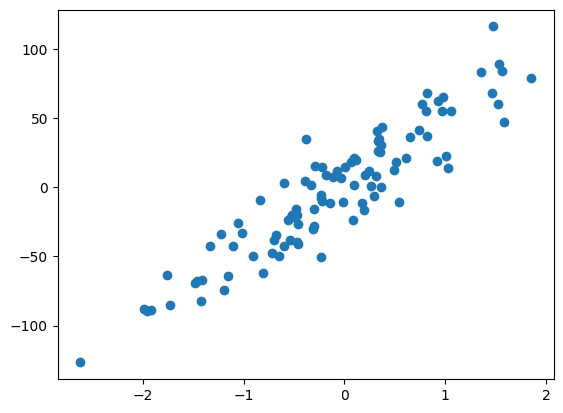

In [8]:
plt.scatter(X,y)
plt.show()


In [13]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)

0.19844442845175525
[46.747264]


In [11]:
y_pred=lr.predict(X_test)
print(r2_score(y_test,y_pred))

0.8019015156159199


c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+04, tolerance: 1.663e+01
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented 

0 [46.747264]
0 0.19844442845175525
1 [45.52446436]
1 0.19844442845175525
5 [40.63326581]
5 0.19844442845175525
15 [28.40526943]
15 0.19844442845175525
30 [10.06327487]
30 0.19844442845175525


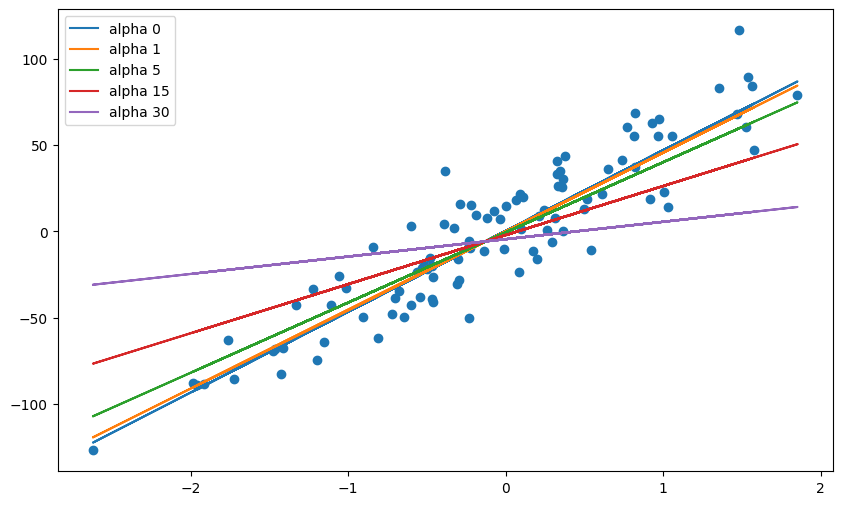

In [22]:
alphas=[0,1,5,15,30]
plt.figure(figsize=(10,6))
plt.scatter(X,y)
for i in alphas:
    L=Lasso(alpha=i)
    L.fit(X_train,y_train)
    plt.plot(X_train,L.predict(X_train),label='alpha {}'.format(i))
    print(i,L.coef_,)
    print(i,lr.intercept_)  
plt.legend()
plt.show()

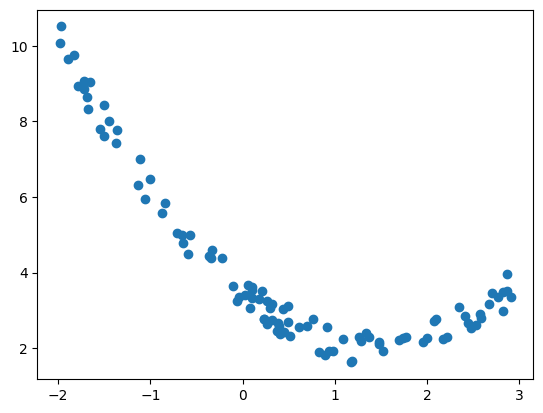

In [34]:
m=100
X1=5*np.random.rand(m,1)-2
X2=0.7*X1**2-2*X1+3+np.random.rand(m,1)
plt.scatter(X1,X2)
plt.show()

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e+00, tolerance: 5.383e-02
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented 

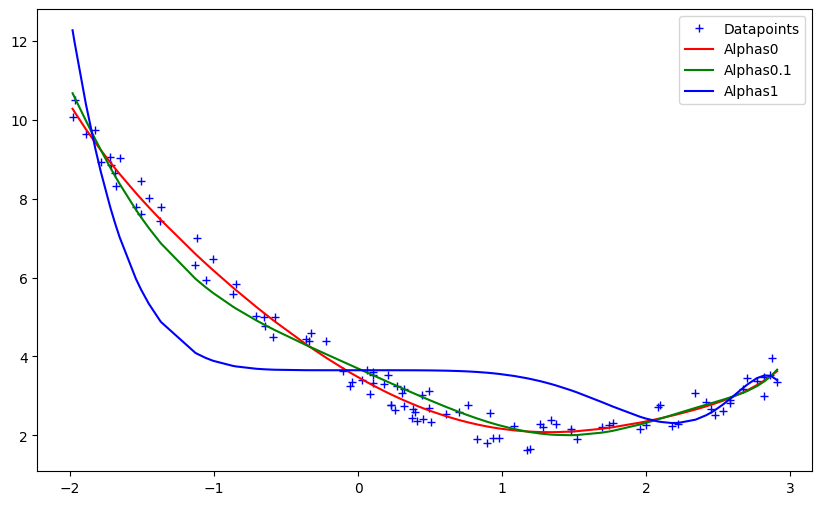

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_pred(X1,X2,alpha):
    model=Pipeline([
        ("pol",PolynomialFeatures(degree=16)),
        ("lasso",Lasso(alpha=alpha))

    ])

    model.fit(X1,X2)
    return model.predict(X1)

alphas=[0,0.1,1]
cs=["r","g","b"]  

plt.figure(figsize=(10,6))
plt.plot(X1,X2,'b+',label='Datapoints')

for alphas,cs in zip(alphas,cs):
    preds=get_pred(X1,X2,alphas)
    plt.plot(sorted(X1[:,0]),preds[np.argsort(X1[:,0])], cs, label = 'Alphas{}'.format(alphas))
plt.legend()
plt.show()